In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn')

In [2]:
# tabl_lex_alcaldes=pd.read_csv("tabl_lex_alcaldes.csv", encoding="latin1", index_col=0)

In [3]:
# tabl_lex_alcaldes=pd.read_csv("tabl_lex_alcaldes_categorias.csv", encoding="latin1", index_col=0)
# tabl_lex_alcaldes=tabl_lex_alcaldes.groupby('Category').sum()
tabl_lex_alcaldes=pd.read_csv("lex_cont_tbl_output_R.csv", encoding="UTF8", index_col=0)

In [4]:
edges_alcaldes=tabl_lex_alcaldes.stack().reset_index()  
edges_alcaldes.columns=["tw_para","tw_de","freq"]
edges_alcaldes=edges_alcaldes[["tw_de","tw_para","freq"]]

In [5]:
mx_fr=max(edges_alcaldes.freq)

In [6]:
coord_nodes=pd.read_csv("nodes_coords.csv", index_col=0)
coord_nodes

,x_pos,y_pos,z_pos
Antes,0.241375,0.033875,-0.009001
Después,-0.151130,-0.021210,0.005636
Arauca,0.181494,0.191558,0.044886
Barranquilla,-0.084658,0.216536,0.043519
Bogotá,0.002704,-0.173467,-0.016155
Bucaramanga,-0.056381,-0.146408,-0.122868
Cali,-0.103305,0.111597,-0.171063
Cúcuta,0.117197,0.150205,-0.126375
Ibagué,-0.050791,0.023369,-0.062066
Medellín,-0.064458,0.009431,-0.069398


In [7]:
g = nx.Graph()

In [8]:
for i, elrow in edges_alcaldes.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [9]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))


# of edges: 198
# of nodes: 31


In [10]:
for n_pos, n_node in coord_nodes.iterrows():
#     print(n_pos,n_node[0],n_node[1])
    g.add_node(n_pos,pos=(n_node[0],n_node[1]))

# g.add_node("Santa Marta",pos=(0,0))#Tunja queda en el centro forzado porque no tenía valores de frecuencias en la tabla de contingencia léxica

In [11]:
mca_pos=nx.get_node_attributes(g,'pos')

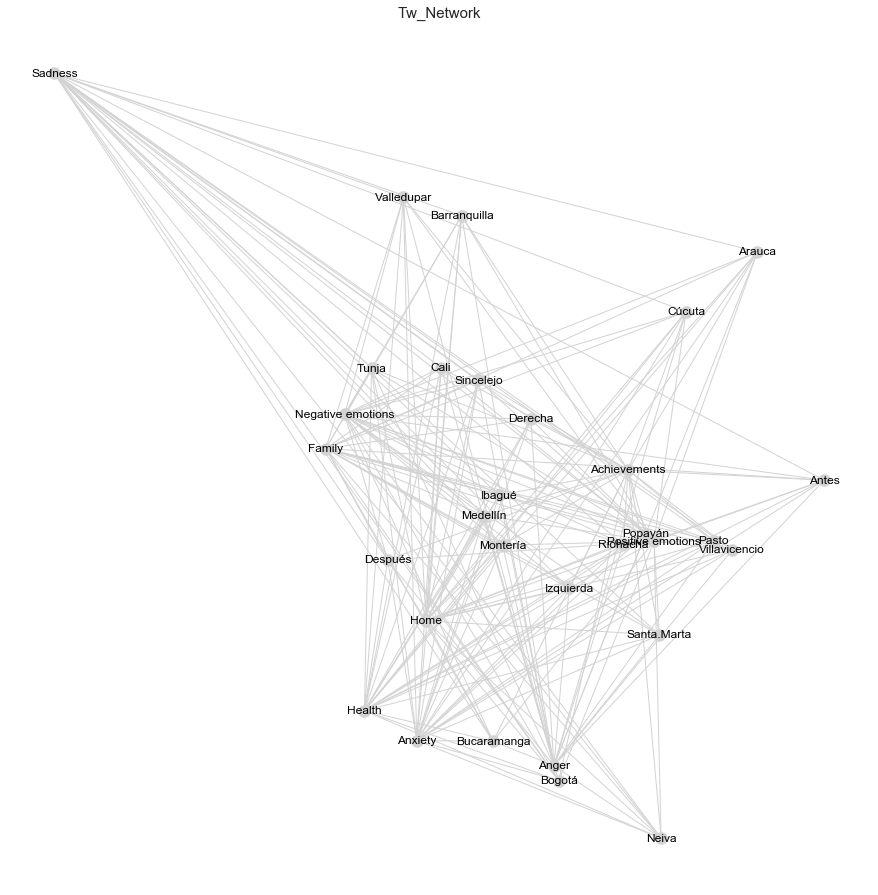

In [12]:
plt.figure(figsize=(12, 12))
nx.draw(g,
        node_size=150,
        edge_color='lightgray',
        node_color='lightgray',
        with_labels=True, 
        pos=mca_pos)
plt.title('Tw_Network', size=15)
plt.show()

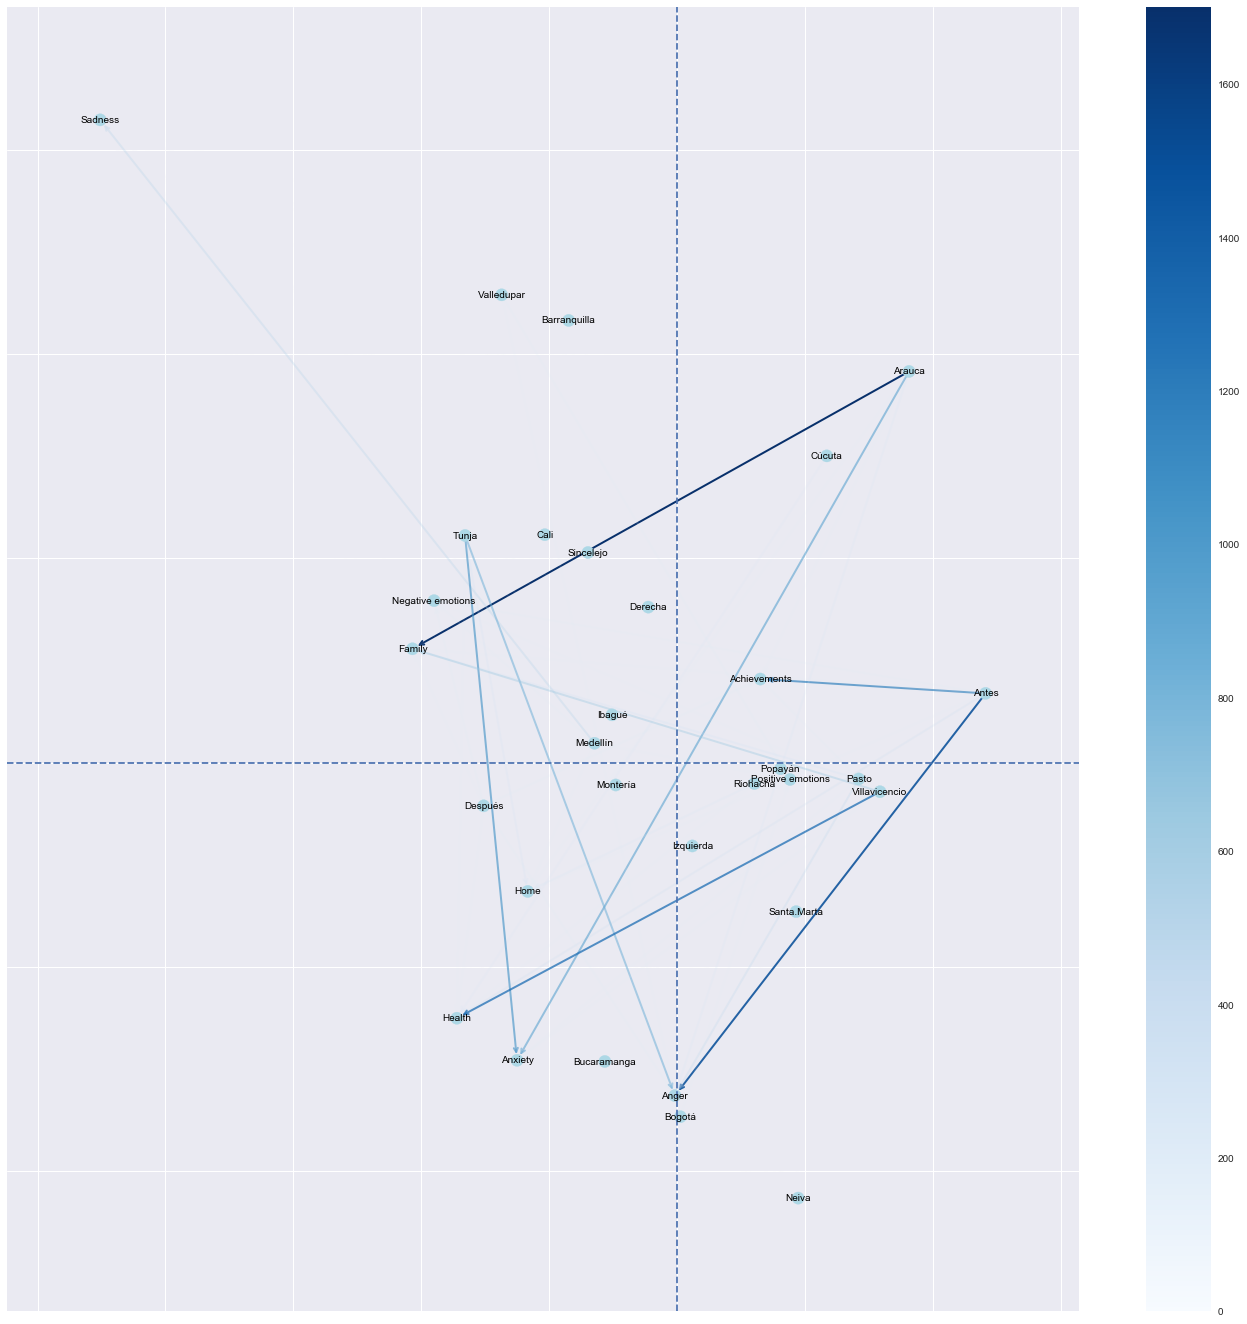

In [13]:
mx_fr=max(edges_alcaldes.freq)


G= nx.DiGraph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in edges_alcaldes.iterrows():
    G.add_edge(elrow[0], elrow[1])

pos = mca_pos#nx.layout.spring_layout(G)

node_sizes = [150 for i in range(len(G))]
M = G.number_of_edges()
edge_colors =[fr for fr in edges_alcaldes.freq]#range(2, M + 2)
edge_alphas =[fr/mx_fr for fr in edges_alcaldes.freq]#[fr/mx_fr for fr in graph_df_filt.freq]#[(5 + i) / (M + 4) for i in range(M)]

# plt.figure(figsize=(12, 12))
plt.figure(figsize=(24, 24))

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

nx.draw_networkx_labels(G, pos, font_size=10)

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.scatter(coord_nodes.x_pos, coord_nodes.y_pos, alpha=0)
ax = plt.gca()
ax.axvline(ls="--")
ax.axhline(ls="--")

plt.grid(True)
# ax.set_axis_off()
plt.show()

# 3D Plot
[mejorar código](https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot)
[gif converter](https://ezgif.com)

In [14]:
coord_nodes_arr=np.array(coord_nodes)

Text(0.5, 1.0, 'X Z')

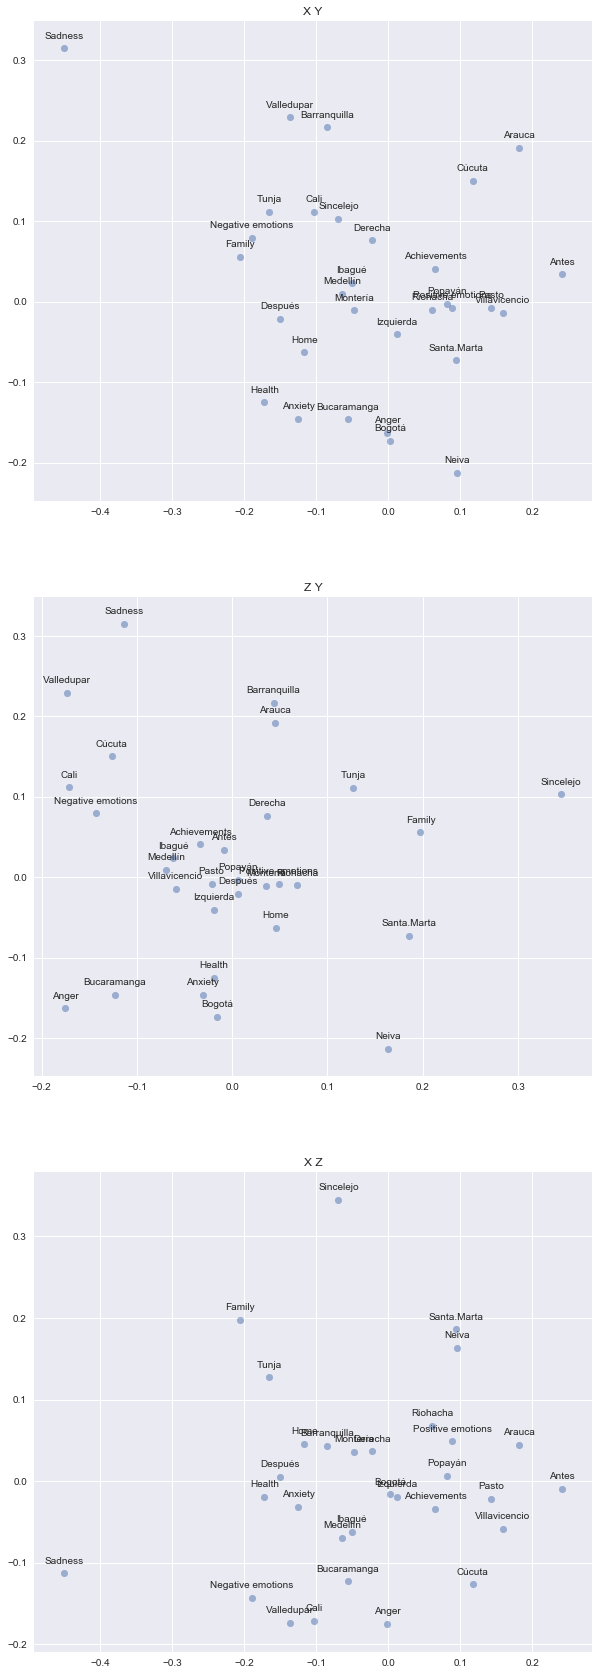

In [15]:
plt.figure(figsize=(10,30))
par_alf=0.5
plt.subplot(311)
plt.scatter(coord_nodes_arr[:,0],coord_nodes_arr[:,1], alpha=par_alf,s=45)#, c=LDA_db_labels_denoised, cmap=plt.cm.Set1)
for point_name in coord_nodes.index:
#     print (coord_nodes.loc[point_name,])
    plt.annotate(point_name, # this is the text
                 (coord_nodes.loc[point_name,"x_pos"],coord_nodes.loc[point_name,"y_pos"]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("X Y")

plt.subplot(312)
plt.scatter(coord_nodes_arr[:,2],coord_nodes_arr[:,1], alpha=par_alf,s=45)#, c=LDA_db_labels_denoised, cmap=plt.cm.Set1)
for point_name in coord_nodes.index:
#     print (coord_nodes.loc[point_name,])
    plt.annotate(point_name, # this is the text
                 (coord_nodes.loc[point_name,"z_pos"],coord_nodes.loc[point_name,"y_pos"]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("Z Y")

plt.subplot(313)
plt.scatter(coord_nodes_arr[:,0],coord_nodes_arr[:,2], alpha=par_alf,s=45)#, c=LDA_db_labels_denoised, cmap=plt.cm.Set1)
for point_name in coord_nodes.index:
#     print (coord_nodes.loc[point_name,])
    plt.annotate(point_name, # this is the text
                 (coord_nodes.loc[point_name,"x_pos"],coord_nodes.loc[point_name,"z_pos"]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("X Z")

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Making animation


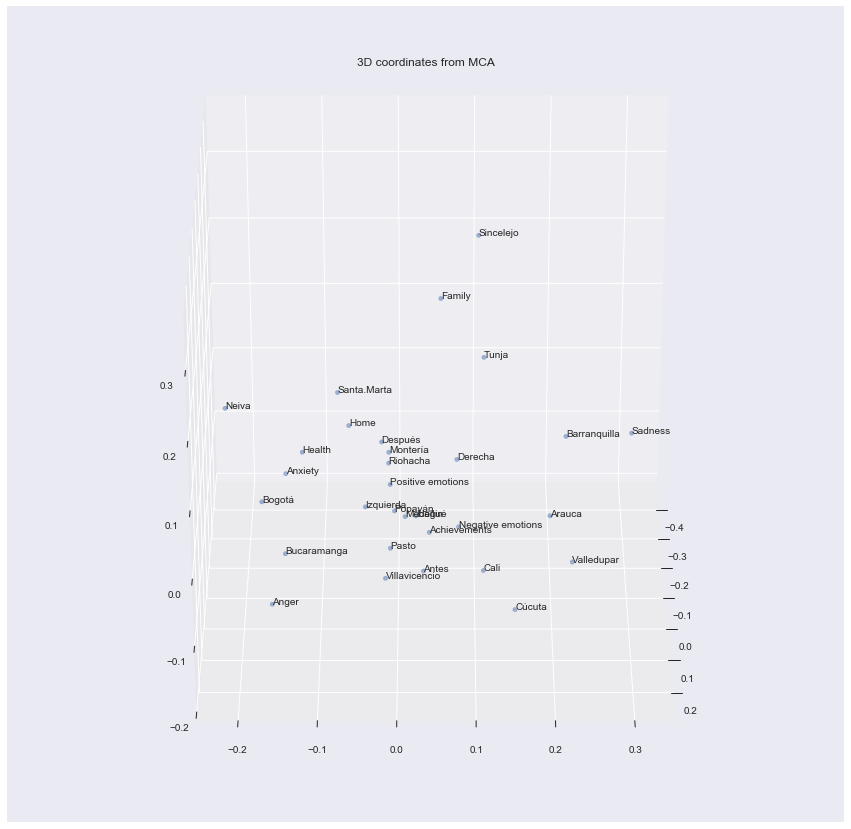

In [16]:
# https://stackoverflow.com/questions/51457738/animating-a-3d-scatterplot-with-matplotlib-to-gif-ends-up-empty
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coord_nodes_arr[:,0],
           coord_nodes_arr[:,1],
           coord_nodes_arr[:,2],
#            c=LDA_db_labels_denoised, 
           alpha=0.5,
           cmap=plt.cm.Set1)
for point_name in coord_nodes.index:
#     print (coord_nodes.loc[point_name,])
# ax.text(9, 0, 0, "red", color='red')
    ax.text(coord_nodes.loc[point_name,"x_pos"],
            coord_nodes.loc[point_name,"y_pos"],
            coord_nodes.loc[point_name,"z_pos"],
            point_name)

plt.title("3D coordinates from MCA")
# plt.axis('off') # remove axes for visual appeal

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
rot_animation.save('alcs_categ_ideol.gif', dpi=80, writer='imagemagick')